In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers.helper_functions import *

# The Significant Bang Theory

Attention, ADA students!

The Sheldon Cooper we all know and love (OK, some of us might not know him, and some might not love him) from the TV series "The Big Bang Theory" has gotten into an argument with Leonard from the same TV show. Sheldon insists that he knows the show better than anyone, and keeps making various claims about the show, which neither of them know how to prove or disprove. The two of them have reached out to you ladies and gentlemen, as data scientists, to help them. You will be given the full script of the series, with information on the episode, the scene, the person saying each dialogue line, and the dialogue lines themselves.

Leonard has challenged several of Sheldon's claims about the show, and throughout this exam you will see some of those and you will get to prove or disprove them, but remember: sometimes, we can neither prove a claim, nor disprove it!

## Deadline
Wednesday, January 30th, 2019; 11:15 A.M. (Swiss time)

_For the deadline for extramural exams, see the submission subsection._

## Important notes
* Don't forget to add a textual description of your thought process, the assumptions you made, and your results!
* Please write all your comments in English, and use meaningful variable names in your code.
* As we have seen during the semester, data science is all about multiple iterations on the same dataset. Do not obsess over small details in the beginning, and try to complete as many tasks as possible during the first 2 hours. Then, go back to the obtained results, write meaningful comments, and debug your code if you have found any glaring mistake.
* Fully read the instructions for each question before starting to solve it to avoid misunderstandings, and remember to save your notebook often!
* The exam contains **15 questions organised into 4 tasks**, and is designed for more than 3 hours. **You do not need to solve everything in order to get a 6**, and you have some freedom is choosing the tasks you wish to solve.
* You cannot leave the room in the first and last 15 minutes.
* You can use all the online resources you want except for communication tools (emails, web chats, forums, phone, etc.). We will be monitoring the network for unusual activity.
* Remember, this is not a homework assignment -- no teamwork allowed!

## Submission
* Your file has to be named as "NameSurname_SCIPER.ipynb".
* Make sure you upload your Jupyter Notebook (1 file) to [this](https://goo.gl/forms/7GLvYl94uSOn54jH2) Google form at the end of the exam, with all the cells already evaluated (except for the Spark-related question, Q7). You need to sign in to Google using your EPFL credentials in order to submit the form.
* In case of problems with the form, send your Jupyter Notebook (along with your name and SCIPER number) as a direct message to @ramtin on Mattermost. This is reserved only for those who encounter problems with the submission -- you need to have a reasonable justification for using this back-up.
* You will have until 11:20 (strict deadline) to turn in your submission. **Late submissions will not be accepted.** This deadline is for the students taking the exam at EPFL -- students taking the exam extramurally will have their submission deadline as the starting time of the exam plus 3 hours and 5 minutes.

## Task A: Picking up the shovel (10 points)

**Note: You will use the data you preprocess in this task in all the subsequent ones.**

Our friends' argument concerns the entire show. We have given you a file in the `data/` folder that contains the script of every single episode. New episodes are indicated by '>>', new scenes by '>', and the rest of the lines are dialogue lines. Some lines are said by multiple people (for example, lines indicated by 'All' or 'Together'); **you must discard these lines**, for the sake of simplicity. However, you do not need to do it for Q1 in this task -- you'll take care of it when you solve Q2.

**Q1**. (5 points) Your first task is to extract all lines of dialogue in each scene and episode, creating a dataframe where each row has the episode and scene where a dialogue line was said, the character who said it, and the line itself. You do not need to extract the proper name of the episode (e.g. episode 1 can appear as "Series 01 Episode 01 - Pilot Episode", and doesn't need to appear as "Pilot Episode"). Then, answer the following question: In total, how many scenes are there in each season? We're not asking about unique scenes; the same location appearing in two episodes counts as two scenes. You can use a Pandas dataframe with a season column and a scene count column as the response.

**Note: The data refers to seasons as "series".**

In [216]:
season = ""
episode = ""
scene = ""
data = []
with open("data/all_scripts.txt") as f:
    for line in f.readlines():
        line = line[:-1]
        if line.startswith(">> "):
            season = int(line[10:12])
            episode = line[3:]
            continue
        if line.startswith("> "):
            scene = line[2:]
            continue
        character, line = line.split(": ", 1)
        data.append([season, episode, scene, character, line])
lines = pd.DataFrame(data, columns=["Season", "Episode", "Scene", "Character", "Line"])
lines

,Season,Episode,Scene,Character,Line
0,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,So if a photon is directed through a plane wit...
1,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,"Agreed, what’s your point?"
2,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,"There’s no point, I just think it’s a good ide..."
3,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,Excuse me?
4,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Receptionist,Hang on.
...,...,...,...,...,...
51287,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Ramona,"Mmm. No big deal, I enjoy spending time with you."
51288,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"And I with you. Question, are you seeking a ro..."
51289,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Ramona,What if I were?
51290,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"Well, that would raise a number of problems. W..."


In [217]:
scenes_per_sea = lines.groupby(['Season', 'Episode', 'Scene']).count().reset_index().groupby('Season').count()[['Scene']]
scenes_per_sea

,Scene
Season,
1,157
2,205
3,193
4,219
5,198
6,211
7,207
8,191
9,177


**Q2**. (5 points) Now, let's define two sets of characters: all the characters, and recurrent characters. Recurrent characters are those who appear in more than one episode. For the subsequent sections, you will need to have a list of recurrent characters. Assume that there are no two _named characters_ (i.e. characters who have actual names and aren't referred to generically as "little girl", "grumpy grandpa", etc.) with the same name, i.e. there are no two Sheldons, etc. Generate a list of recurrent characters who have more than 90 dialogue lines in total, and then take a look at the list you have. If you've done this correctly, you should have a list of 20 names. However, one of these is clearly not a recurrent character. Manually remove that one, and print out your list of recurrent characters. To remove that character, pay attention to the _named character_ assumption we gave you earlier on. **For all the subsequent questions, you must only keep the dialogue lines said by the recurrent characters in your list.**

_Hint: "I know all the recurrent characters because I've watched the entire series five times" is not an acceptable argument, so you need to actually generate the list._

In [218]:
recurr = lines.groupby('Character').count()[['Line']].reset_index()
recurr = recurr[recurr['Line']>90]
recurr = recurr[recurr['Character']!='Man']
display(recurr)

lines_keep = pd.merge(lines, recurr['Character'], on='Character', how='inner')
lines_keep

,Character,Line
10,Amy,3472
13,Arthur,130
20,Bernadette,2690
21,Bert,95
23,Beverley,162
52,Emily,164
71,Howard,5872
90,Kripke,106
95,Leonard,9829
98,Leslie,116


,Season,Episode,Scene,Character,Line
0,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,So if a photon is directed through a plane wit...
1,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,"There’s no point, I just think it’s a good ide..."
2,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,I think this is the place.
3,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,"Leonard, I don’t think I can do this."
4,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,No. We are committing genetic fraud. There’s n...
...,...,...,...,...,...
48341,10,Series 10 Episode 14 – The Emotion Detection A...,Raj’s apartment.,Emily,"Okay. Well, whenever you and I were in bed…"
48342,10,Series 10 Episode 14 – The Emotion Detection A...,Raj’s apartment.,Emily,"Oh, yeah, that used to drive me nuts. He’s kin..."
48343,10,Series 10 Episode 14 – The Emotion Detection A...,Raj’s apartment.,Emily,"You know, the same thing happened to me. After..."
48344,10,Series 10 Episode 14 – The Emotion Detection A...,Raj’s apartment.,Emily,Without question.


## Task B: Read the ~~stats~~ scripts carefully (30 points)

### Part 1: Don't put the shovel down just yet

**Q3**. (2.5 points) From each dialogue line, replace punctuation marks (listed in the EXCLUDE_CHARS variable provided in `helpers/helper_functions.py`) with whitespaces, and lowercase all the text. **Do not remove any stopwords, leave them be for all the questions in this task.**

In [219]:
def clean_line(line):
    for char in EXCLUDE_CHARS:
        line = line.replace(char, ' ')
    return line.lower()

lines_keep['Line'] = lines_keep['Line'].apply(lambda x: clean_line(x))
lines_keep

,Season,Episode,Scene,Character,Line
0,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,so if a photon is directed through a plane wit...
1,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,there s no point i just think it s a good ide...
2,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,i think this is the place
3,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,leonard i don t think i can do this
4,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,no we are committing genetic fraud there s n...
...,...,...,...,...,...
48341,10,Series 10 Episode 14 – The Emotion Detection A...,Raj’s apartment.,Emily,okay well whenever you and i were in bed…
48342,10,Series 10 Episode 14 – The Emotion Detection A...,Raj’s apartment.,Emily,oh yeah that used to drive me nuts he s kin...
48343,10,Series 10 Episode 14 – The Emotion Detection A...,Raj’s apartment.,Emily,you know the same thing happened to me after...
48344,10,Series 10 Episode 14 – The Emotion Detection A...,Raj’s apartment.,Emily,without question


**Q4**. (5 points) For each term, calculate its "corpus frequency", i.e. its number of occurrences in the entire series. Visualize the distribution of corpus frequency using a histogram. Explain your observations. What are the appropriate x and y scales for this plot?

In [220]:
corpus_frequency = pd.concat([pd.Series(row['Line'].split(' ')) for _, row in lines.iterrows()]).reset_index()
corpus_frequency.columns = ["Frequency", "Word"]
corpus_frequency = corpus_frequency.groupby("Word").count()


<AxesSubplot: title={'center': 'Frequency histogram'}, ylabel='Frequency'>

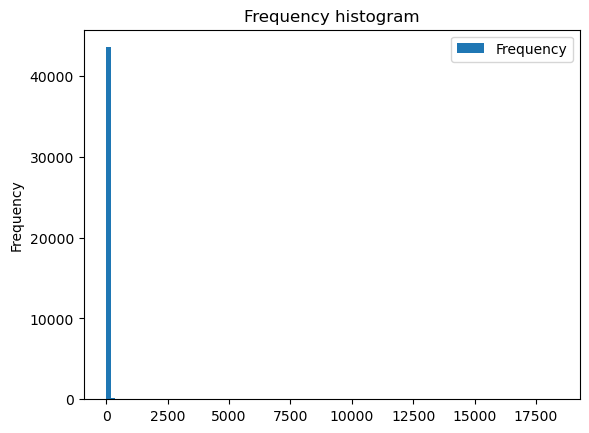

In [221]:
corpus_frequency.plot.hist(column=["Frequency"], bins=100, title="Frequency histogram")

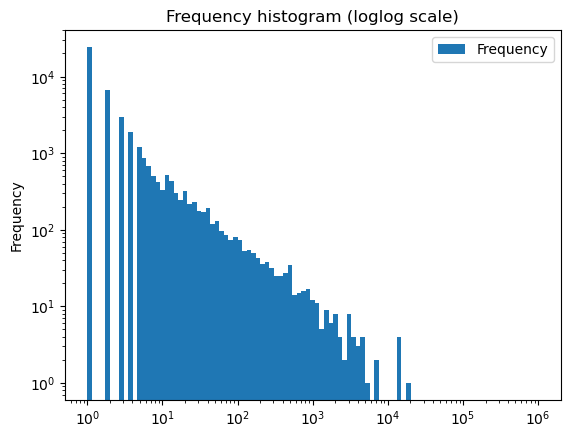

In [222]:
corpus_frequency.plot.hist(column=["Frequency"], loglog=True, bins=np.logspace(0, 6, 100),
                           title="Frequency histogram (loglog scale)");

### Part 2: Talkativity
**Q5**. (2.5 points) For each of the recurrent characters, calculate their total number of words uttered across all episodes. Based on this, who seems to be the most talkative character?

In [223]:
lines_keep["Words"] = lines_keep["Line"].apply(lambda x: len(x.split()))
words_per_char = lines_keep.groupby('Character')['Words'].sum()
display(words_per_char)
most_talkative = words_per_char.idxmax()
most_talkative

Character
Amy              39933
Arthur            1451
Bernadette       27726
Bert              1146
Beverley          2029
Emily             1571
Howard           69505
Kripke            1246
Leonard         102496
Leslie            1249
Mrs Cooper        3389
Mrs Wolowitz      1459
Penny            79270
Priya             1940
Raj              60099
Sheldon         185388
Stuart            7955
Wil               1678
Zack              1427
Name: Words, dtype: int64

'Sheldon'

**Q6**. (12.5 points) For each of the recurrent characters, calculate their total number of words uttered per episode (ignoring episodes that the character does not appear in), and calculate a **robust summary statistic** for the word count distribution of each person.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (2.5 points) What changes do you observe, compared to the analysis in Q5?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (2.5 points) Why is this analysis an improvement over the previous one, and how could you improve it even further? _Hint: The improvement involves making your unit for word counts even more granular - you can go further down than episodes._

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (7.5 points) Incorporate that improvement. Do you still see the same results? How **confident** can you be that the "most talkative" person given by this twice improved method is really more talkative than the second most talkative one? _Hint: Read the question again. A good idea would be to use bootstrapping and calculate your summary statistic on each bootstrapped set._

In [224]:
words_per_char_per_ep = lines_keep.groupby(['Character', 'Episode'])['Words'].sum()
words_per_char_per_ep = words_per_char_per_ep.reset_index()
# tmp_1 = words_per_char_per_ep.groupby('Character')['Words'].mean()
tmp_2 = words_per_char_per_ep.groupby('Character')['Words'].median()
# display(tmp_1)
display(tmp_2)
most_talkative_median = tmp_2.idxmax()
most_talkative_median
tmp_2 = tmp_2.reset_index()
words_per_char = words_per_char.reset_index()
tmp = pd.merge(tmp_2, words_per_char, on='Character', how='inner')
tmp

Character
Amy             234.0
Arthur          325.0
Bernadette      157.0
Bert            199.0
Beverley        184.0
Emily            87.0
Howard          289.0
Kripke          162.0
Leonard         397.0
Leslie          121.0
Mrs Cooper      293.5
Mrs Wolowitz     39.0
Penny           323.0
Priya           145.0
Raj             219.0
Sheldon         775.0
Stuart          112.5
Wil             122.5
Zack            139.5
Name: Words, dtype: float64

,Character,Words_x,Words_y
0,Amy,234.0,39933
1,Arthur,325.0,1451
2,Bernadette,157.0,27726
3,Bert,199.0,1146
4,Beverley,184.0,2029
5,Emily,87.0,1571
6,Howard,289.0,69505
7,Kripke,162.0,1246
8,Leonard,397.0,102496
9,Leslie,121.0,1249


In [225]:
# If we want to measure the importance of a character, we get better interpretability with this new measure as we can find how 
# much a character speaks in a single episode so it can account for the characters that only appear in particular episode and not 
# in the entire show.

# We could further increase the granularity by finding the number of words per character per scene per episode. 

words_per_char_per_ep_per_scene = lines_keep.groupby(['Character', 'Episode', 'Scene'])['Words'].sum()
words_per_char_per_ep_per_scene = words_per_char_per_ep_per_scene.reset_index()
words_per_char_per_ep_per_scene
# tmp_1 = words_per_char_per_ep.groupby('Character')['Words'].mean()
tmp_2 = words_per_char_per_ep_per_scene.groupby(['Character', 'Episode'])['Words'].median()
tmp_2 = tmp_2.reset_index()
tmp_2 = words_per_char_per_ep_per_scene.groupby('Character')['Words'].median()
tmp_2

Character
Amy              65.5
Arthur          107.5
Bernadette       52.0
Bert             82.0
Beverley        107.0
Emily            34.5
Howard           64.0
Kripke           57.5
Leonard          67.0
Leslie           61.0
Mrs Cooper      128.5
Mrs Wolowitz     26.0
Penny            71.0
Priya            44.0
Raj              59.0
Sheldon         117.0
Stuart           52.5
Wil              46.5
Zack             61.0
Name: Words, dtype: float64

### Part 3: Obligatory Spark cameo
**Q7**. (7.5 points) Write a Spark script that does the following: Given the raw input file and your list of recurrent characters, create an RDD containing (speaker, dialogue line) rows **only for the recurrent characters** (assume that you already have the list --  no need to calculate it using Spark), and then generate a vectorized bag of words representation for each dialogue line, thus generating an RDD with (speaker, bag of words vector) rows. Then, calculate an aggregated bag of words vector (sum of all vectors) for each person. The final output is therefore an RDD with each of its rows being (speaker, aggregated bag of words vector). For your bag of words vectors, you can use $1\times|V|$ scipy CSR matrices (where $|V|$ is the size of the vocabulary). No filtering of the vocabulary is necessary for this part.

You do not need to run this script, but you do need to use Spark logic and also, the syntax needs to be correct.

## Task C: The Gossip Graph (30 points)

**Note: Only for this task, discard the recurrent characters whose names are not single words, e.g. Mrs. Cooper.**

Let us define _gossip_ as follows: if a dialogue line of character A mentions B by name in a scene that does not involve character B, we say that “A gossips about B” in that line. Multiple mentions of the same person in a single line are counted once, but a character can gossip about several others in the same line. For the sake of simplicity, we only consider gossips where the name of the recurrent character is mentioned as it appears in our list of characters; for example, if someone says "Cooper" and they mean Sheldon, we discard that.

**Q8**. (12.5 points) Create the two following graphs first:

1. (5 points) Create the _familiarity graph_, an undirected weighted graph, in which there is a node for each recurrent character, and an edge between two characters if they appear together in at least one scene. The weight of the edge between them is the number of scenes they appear in together. If an edge exists between two people in the familiarity graph, we say that they "know each other".
2. (7.5 points) Create the _gossip graph_, which is a directed weighted graph, in which there there is a node for each recurrent character, and a directed edge from the node for A to the node for B if A has gossiped about B at least once. The weight of the edge is the number of scenes in which A has gossiped about B.

_Hint: You can create each graph first as an adjacency matrix and then create a networkx graph out of that._

In [226]:
lines_keep = lines_keep[~lines_keep['Character'].isin(['Mrs Cooper', 'Mrs Wolowitz'])]
lines_keep['Character'].unique()

array(['Sheldon', 'Leonard', 'Penny', 'Howard', 'Raj', 'Leslie', 'Kripke',
       'Beverley', 'Stuart', 'Bernadette', 'Wil', 'Zack', 'Amy', 'Priya',
       'Arthur', 'Bert', 'Emily'], dtype=object)

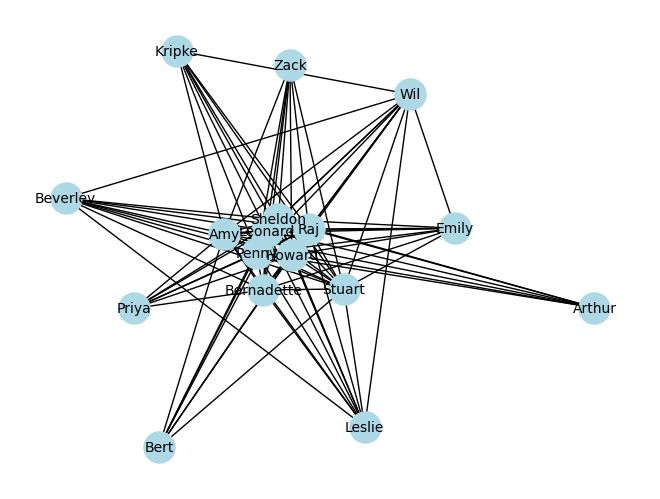

In [227]:
from itertools import combinations
import networkx as nx

scene_groups = lines_keep.groupby(['Episode', 'Scene'])['Character'].unique()
# display(scene_groups)

# Step 2: Create pairwise relationships
pair_counts = {}

for characters in scene_groups:
    # Generate all pairs of characters
    pairs = combinations(sorted(characters), 2)
    for pair in pairs:
        if pair not in pair_counts:
            pair_counts[pair] = 0
        pair_counts[pair] += 1

# Step 3: Create the graph
G_fam = nx.Graph()

# Add edges with weights
for (char1, char2), weight in pair_counts.items():
    G_fam.add_edge(char1, char2, weight=weight)

# Optional: Add nodes (if not already added by edges)
familiarity_nodes = lines_keep['Character'].unique()
for char in familiarity_nodes:
    if char not in G_fam:
        G_fam.add_node(char)

import matplotlib.pyplot as plt

# Draw the graph with edge weights
pos = nx.spring_layout(G_fam)
nx.draw(G_fam, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10)
# labels = nx.get_edge_attributes(G_fam, 'weight')
# nx.draw_networkx_edge_labels(G_fam, pos, edge_labels=labels)
plt.show()

Character List: ['Sheldon', 'Leonard', 'Penny', 'Howard', 'Raj', 'Leslie', 'Kripke', 'Beverley', 'Stuart', 'Bernadette', 'Wil', 'Zack', 'Amy', 'Priya', 'Arthur', 'Bert', 'Emily']
                                                Line   Mentions
0  so if a photon is directed through a plane wit...      [Wil]
1  there s no point  i just think it s a good ide...         []
2                         i think this is the place          []
3              leonard  i don t think i can do this   [Leonard]
4  no  we are committing genetic fraud  there s n...         []


C:\Users\jacqu\AppData\Local\Temp/ipykernel_21992/1987761507.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lines_keep['Mentions'] = lines_keep['Line'].apply(lambda x: extract_mentions(x, character_list))


Gossip Data: defaultdict(<class 'int'>, {('Sheldon', 'Wil'): 388, ('Sheldon', 'Leonard'): 693, ('Sheldon', 'Penny'): 404, ('Sheldon', 'Howard'): 145, ('Sheldon', 'Sheldon'): 140, ('Sheldon', 'Raj'): 115, ('Sheldon', 'Leslie'): 8, ('Sheldon', 'Bert'): 46, ('Sheldon', 'Amy'): 323, ('Sheldon', 'Kripke'): 40, ('Sheldon', 'Stuart'): 43, ('Sheldon', 'Bernadette'): 43, ('Sheldon', 'Priya'): 11, ('Sheldon', 'Zack'): 9, ('Sheldon', 'Arthur'): 19, ('Sheldon', 'Emily'): 7, ('Sheldon', 'Beverley'): 4, ('Leonard', 'Sheldon'): 609, ('Leonard', 'Leonard'): 67, ('Leonard', 'Bert'): 11, ('Leonard', 'Howard'): 182, ('Leonard', 'Penny'): 338, ('Leonard', 'Wil'): 133, ('Leonard', 'Raj'): 134, ('Leonard', 'Amy'): 74, ('Leonard', 'Leslie'): 22, ('Leonard', 'Arthur'): 6, ('Leonard', 'Kripke'): 12, ('Leonard', 'Beverley'): 2, ('Leonard', 'Stuart'): 42, ('Leonard', 'Bernadette'): 32, ('Leonard', 'Zack'): 14, ('Leonard', 'Priya'): 26, ('Leonard', 'Emily'): 4, ('Penny', 'Penny'): 37, ('Penny', 'Leonard'): 403, (

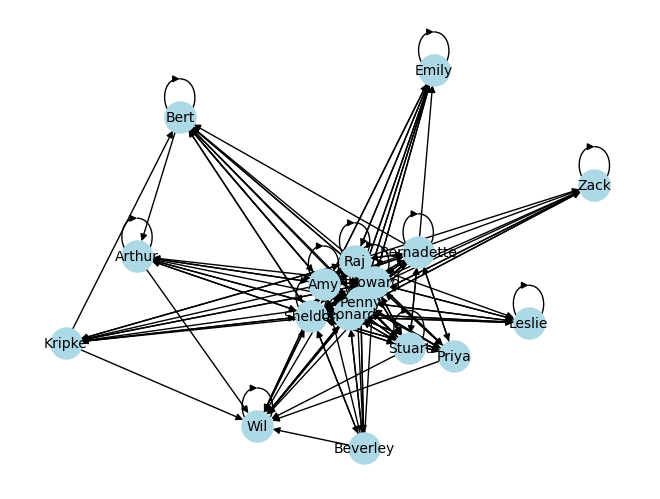

In [228]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the function to extract mentions
def extract_mentions(line, character_list):
    mentions = []
    line = line.lower()  # Make line lowercase for case-insensitive matching
    for char in character_list:
        char_lower = char.lower()  # Make character lowercase
        if char_lower in line and char_lower != line:  # Avoid self-references
            mentions.append(char)
    return mentions

# Step 2: Preprocess character list
character_list = lines_keep['Character'].unique()
character_list = [char.strip() for char in character_list if char.strip()]  # Remove empty strings
print("Character List:", character_list)

# Step 3: Add mentions column to the DataFrame
lines_keep['Mentions'] = lines_keep['Line'].apply(lambda x: extract_mentions(x, character_list))

# Debugging: Check if Mentions column is populated
print(lines_keep[['Line', 'Mentions']].head())

# Step 4: Build the gossip data dictionary
gossip_data = defaultdict(int)

for _, row in lines_keep.iterrows():
    character = row['Character']  # Who is speaking
    mentions = row['Mentions']  # Already extracted mentions
    for mentioned in mentions:
        gossip_data[(character, mentioned)] += 1

# Debugging: Check if gossip_data is populated
print("Gossip Data:", gossip_data)

# Step 5: Create the graph
G_gos = nx.DiGraph()

# Add edges with weights
for (char1, char2), weight in gossip_data.items():
    G_gos.add_edge(char1, char2, weight=weight)

# Optional: Add nodes (if not already added by edges)
familiarity_nodes = lines_keep['Character'].unique()
for char in familiarity_nodes:
    if char not in G_gos:
        G_gos.add_node(char)

# Step 6: Draw the graph
pos = nx.spring_layout(G_gos)
nx.draw(G_gos, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10)

# Optional: Add edge labels to show weights
# labels = nx.get_edge_attributes(G_gos, 'weight')
# nx.draw_networkx_edge_labels(G_gos, pos, edge_labels=labels)

plt.show()

Now, answer the following questions:

**Q9**. (5 points) Sheldon claims that every character in the show is familiar with everyone else through at most one intermediary. Based on the familiarity graph, is this true? If not, at most how many intermediaries are needed?

In [229]:
print("Is the familiarity connected ? ", nx.is_connected(G_fam))
oui=dict(nx.all_pairs_shortest_path_length(G_fam))
oui.items()

# The longest shortest path is of length 2 so it is true that every character in the  show is familiar with everyone else through
# at most one iintermediary.

Is the familiarity connected ?  True


dict_items([('Leonard', {'Leonard': 0, 'Sheldon': 1, 'Howard': 1, 'Penny': 1, 'Raj': 1, 'Leslie': 1, 'Kripke': 1, 'Beverley': 1, 'Stuart': 1, 'Bernadette': 1, 'Wil': 1, 'Zack': 1, 'Amy': 1, 'Priya': 1, 'Arthur': 1, 'Emily': 1, 'Bert': 1}), ('Sheldon', {'Sheldon': 0, 'Leonard': 1, 'Howard': 1, 'Penny': 1, 'Raj': 1, 'Leslie': 1, 'Kripke': 1, 'Beverley': 1, 'Stuart': 1, 'Bernadette': 1, 'Wil': 1, 'Amy': 1, 'Zack': 1, 'Priya': 1, 'Arthur': 1, 'Emily': 1, 'Bert': 1}), ('Howard', {'Howard': 0, 'Leonard': 1, 'Penny': 1, 'Sheldon': 1, 'Raj': 1, 'Leslie': 1, 'Kripke': 1, 'Beverley': 1, 'Stuart': 1, 'Bernadette': 1, 'Wil': 1, 'Amy': 1, 'Zack': 1, 'Priya': 1, 'Arthur': 1, 'Bert': 1, 'Emily': 1}), ('Penny', {'Penny': 0, 'Howard': 1, 'Leonard': 1, 'Sheldon': 1, 'Raj': 1, 'Leslie': 1, 'Kripke': 1, 'Beverley': 1, 'Stuart': 1, 'Bernadette': 1, 'Wil': 1, 'Zack': 1, 'Amy': 1, 'Priya': 1, 'Arthur': 1, 'Emily': 1, 'Bert': 1}), ('Raj', {'Raj': 0, 'Howard': 1, 'Leonard': 1, 'Penny': 1, 'Sheldon': 1, 'Leslie

**Q10**. (5 points) Who is the character through whom the largest number of these indirect familiarities happen? Calculate an appropriate centrality metric on the familiarity graph to answer this question. You can use the package networkx for this section.

In [230]:
import operator

pr = nx.pagerank(G_fam)
print('Character with largest PageRank centrality :', max(pr.items(), key=operator.itemgetter(1))[0])

Character with largest PageRank centrality : Sheldon


**Q11**. (2.5 points) Another claim of Sheldon's is that every recurrent character in the show gossips about all the other recurrent characters. What property of the gossip graph would correspond to this? Does the gossip graph possess that property? If not, then is it the case that for every pair of recurrent characters, at least one gossips about the other? What property would this correspond to?

In [231]:
# If every recurrent character gossips about all the other recurrent characters then the gossip graph would be fully connected
# (or complete). 
n = G_gos.number_of_nodes()
expected_edges = n * (n - 1)  # For directed graph: total possible edges
if not G_gos.is_directed():
    expected_edges //= 2  # For undirected graph

is_complete = G_gos.number_of_edges() == expected_edges
print(f"Is the graph complete? {is_complete}")

# The graph is not complete hence, Sheldon's claim is false.
# Weakly connected graph

Is the graph complete? False


**Q12**. (5 points) Use the gossip graph and the familiarity graph to figure out if for every pair of recurrent characters, one of them has gossiped about the other if and only if they know each other. Explain your method - the simpler, the better.

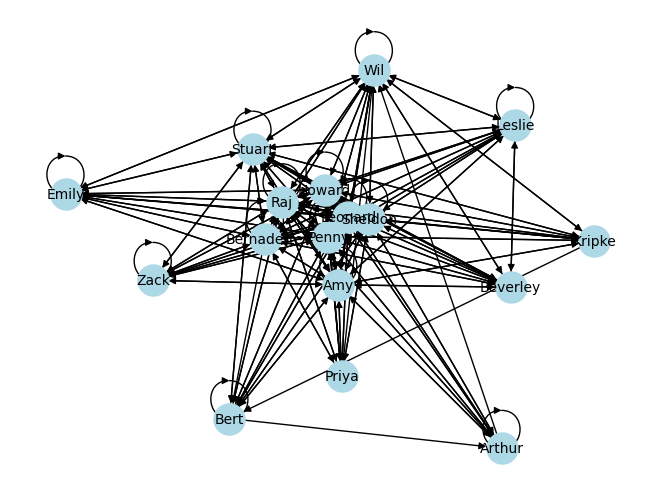

In [232]:
# Inner join the edges of the two graphs
new_G = nx.compose(G_fam.to_directed(), G_gos)
# Draw the graph with edge weights
pos = nx.spring_layout(new_G)
nx.draw(new_G, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10)
# labels = nx.get_edge_attributes(G_fam, 'weight')
# nx.draw_networkx_edge_labels(G_fam, pos, edge_labels=labels)
plt.show()

## Task D: The Detective's Hat (30 points)

Sheldon claims that given a dialogue line, he can, with an accuracy of above 70%, say whether it's by himself or by someone else. Leonard contests this claim, since he believes that this claimed accuracy is too high. Leonard also suspects that it's easier for Sheldon to distinguish the lines that _aren't_ his, rather than those that _are_. We want you to put on the (proverbial) detective's hat and to investigate this claim.

**Q13**. (7.5 points) Divide the set of all dialogue lines into two subsets: the training set, consisting of all the seasons except the last two, and the test set, consisting of the last two seasons. Each of your data points (which is one row of your matrix) is one **dialogue line**. Now, use the scikit-learn class **TfIdfVectorizer** to create TF-IDF representations for the data points in your training and test sets. Note that since you're going to train a machine learning model, everything used in the training needs to be independent of the test set. As a preprocessing step, remove stopwords and words that appear only once from your vocabulary. Use the simple tokenizer provided in `helpers/helper_functions.py` as an input to the TfidfVectorizer class, and use the words provided in `helpers/stopwords.txt` as your stopwords.

In [233]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Load stopwords from file
with open('helpers/stopwords.txt', 'r') as f:
    stop_words = f.read().splitlines()  # Read stopwords as a list

vec = TfidfVectorizer(tokenizer=simple_tokeniser, stop_words=stop_words)

X = lines_keep[['Season', 'Line', 'Character']]
X_train = X[X['Season']<=8][['Line', 'Character']]
X_test = X[X['Season']>8][['Line', 'Character']]

train = vec.fit_transform(X_train['Line'])
test = vec.transform(X_test['Line'])

c:\Users\jacqu\anaconda3\envs\adaexam\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


**Q14**. (5 points) Find the set of all words in the training set that are only uttered by Sheldon. Is it possible for Sheldon to identify himself only based on these? Use the test set to assess this possibility, and explain your method.

In [ ]:
words_for_chars = pd.concat([pd.Series(row["Character"], row['Line'].split())
                             for _, row in X_train.iterrows()]).reset_index()
words_for_chars.columns = ["Word", "Character"]
display(words_for_chars)

words_for_chars = words_for_chars.groupby("Word")["Character"].apply(set)
display(words_for_chars)
sheldon_words = words_for_chars[words_for_chars.apply(lambda x: ("Sheldon" in x) and (len(x) == 1))].index
display(sheldon_words)

,Word,Character
0,so,Sheldon
1,if,Sheldon
2,a,Sheldon
3,photon,Sheldon
4,is,Sheldon
...,...,...
466847,to,Emily
466848,do,Emily
466849,it,Emily
466850,for,Emily


Word
0                                   {Sheldon, Howard, Leonard}
00                                           {Howard, Leonard}
000          {Howard, Sheldon, Bernadette, Leonard, Stuart,...
000lb                                                {Sheldon}
01100111                                             {Sheldon}
                                   ...                        
…thousand                                            {Leonard}
…tion                                                {Sheldon}
…when                                                  {Penny}
…who                                                 {Leonard}
♪                                                        {Amy}
Name: Character, Length: 19417, dtype: object

Index(['000lb', '01100111', '0700', '08', '102', '112', '114', '1175', '11n',
       '11pm',
       ...
       '“sarcasm”', '“thanks', '“waltz”', '“with', '“world', '“would', '“ye',
       '…playing', '…the', '…tion'],
      dtype='object', name='Word', length=5305)

In [235]:
def contains_sheldon_words(line):
    for word in sheldon_words:
        if word in line.split():
            return True
    return False
test_pred = X_test["Line"].apply(contains_sheldon_words)
test_true = X_test["Character"] == "Sheldon"

In [236]:
print("Accuracy: ", (test_true == test_pred).sum() / len(test_true))

Accuracy:  0.7698061214447397


**Q15**. (17.5 points) Now, perform singular value decomposition (SVD) on the training TF-IDF matrix, and calculate a **25-dimensional approximation** for both the training and test TF-IDF matrices (you can do this using scikit-learn's **TruncatedSVD** class). Then, train a logistic regression classifier with 10-fold cross-validation (using the scikit-learn **LogisticRegressionCV** class) on the output of the SVD that given a dialogue line, tells you whether it's by Sheldon or by someone else.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (7.5 points) Report precision, recall and F1-score for both classes (Sheldon and not-Sheldon), as well as accuracy, of your classifier on the training set and the test set. You need to implement the calculation of the evaluation measures (precision, etc.) yourself -- using the scikit-learn functions for them is not allowed.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (5 points) What difference do you observe between the model's scores on the training and test sets? What could you infer from the amount of difference you see? What about the difference between scores on the two classes? Given the performance of your classifier, is Leonard right that the accuracy Sheldon claims is unattainable? What about his suspicions about the lines that Sheldon can and cannot distinguish?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (2.5 points) List 10 of the most extreme false positives and 10 of the most extreme false negatives, in terms of the probabilities predicted by the logistic regression model. What are common features of false positives? What about the false negatives?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv)** (2.5 points) What is the most important feature in the model? What are the 5 most important words in this feature? _Hint: Think of the definition of an SVD, and that you did an SVD on the TF-IDF matrix with dialogue lines as rows and words as columns. You have projected the original data points onto a 25-dimensional subspace -- you need to look at the unit vectors you used for the projection._

In [247]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 25, random_state=42)

train_svd = svd.fit_transform(train)
test_svd = svd.transform(test)

In [244]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=10, random_state=42, max_iter=200)

y_train = X[X['Season']<=8][['Character']]
y_test = X[X['Season']>8][['Character']]


def is_sheldon(character):
    if character == 'Sheldon':
        return 1
    else:
        return 0

y_train = y_train['Character'].apply(lambda x: is_sheldon(x))
y_test = y_test['Character'].apply(lambda x: is_sheldon(x))

clf.fit(train_svd, y_train)

LogisticRegressionCV(cv=10, max_iter=200, random_state=42)

In [249]:
def accuracy_fn(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision_fn(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    if tp + fp == 0:
        return 0.0  # Define precision as 0 when no positive predictions
    return tp / (tp + fp)

def recall_fn(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    if tp + fn == 0:
        return 0.0  # Define recall as 0 when no positive true labels
    return tp / (tp + fn)

def f1_score_fn(y_true, y_pred):
    prec = precision_fn(y_true, y_pred)
    rec = recall_fn(y_true, y_pred)
    if prec + rec == 0:
        return 0.0  # Define F1-score as 0 when both precision and recall are 0
    return 2 * prec * rec / (prec + rec)

In [250]:
y_pred = clf.predict(test_svd)
f1 = f1_score_fn(y_test, y_pred)
f1

0.01235657546337158

In [251]:
precision = precision_fn(y_test, y_pred)
precision

0.4827586206896552

In [252]:
recall = recall_fn(y_test, y_pred)
recall

0.006258381761287439

In [253]:
accuracy = accuracy_fn(y_test, y_pred)
accuracy

0.7797460879834662